In [2]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames

### Task 1 - Hermit's Polynomials

Draw the first six Hermit's polynomials(either on one plot or in a 2x3 or 3x2 grid) (1 pkt).

Hermit's Polynomialas are defined with recursion as:

$H_0(x) = 1$

$H_1(x) = 2x$

$H_{n+1}(x) = 2xH_n(x)-2nH_{n-1}$

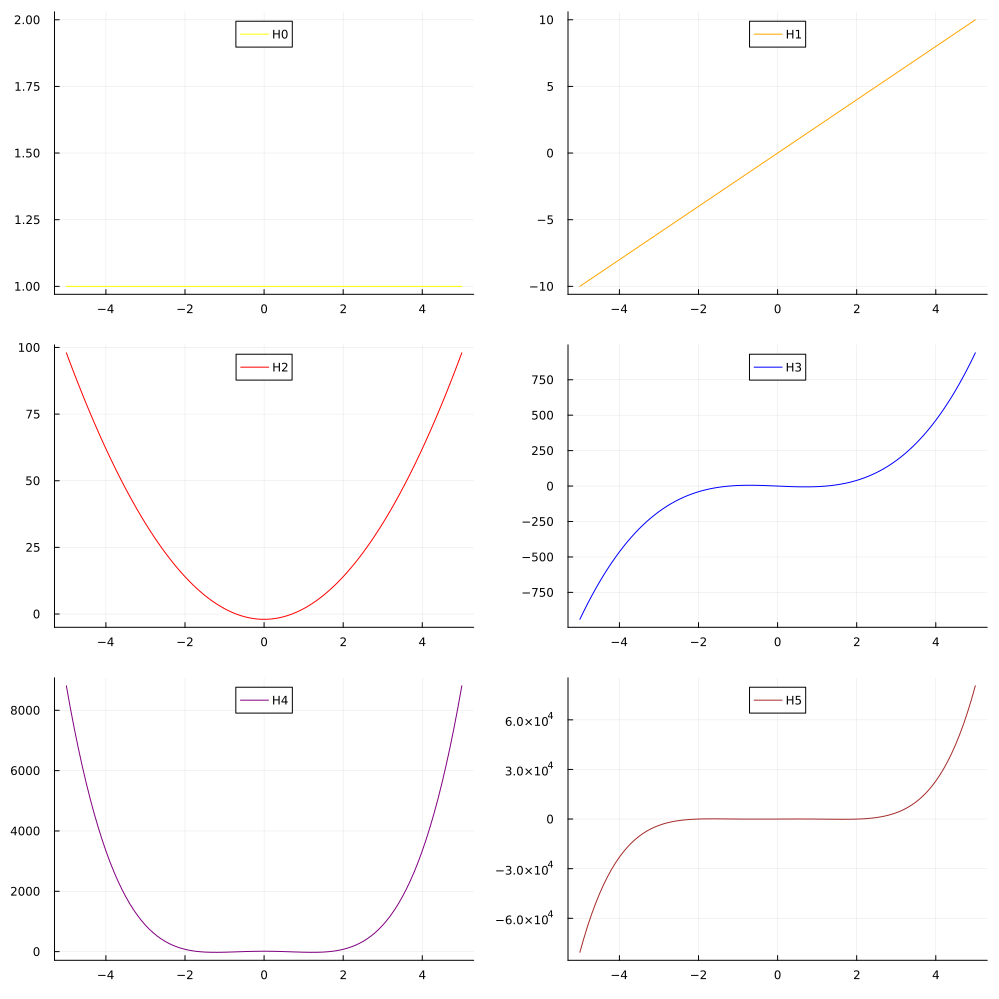

In [6]:
xs = -5:0.1:5 
h0 = basis(Hermite, 0)
h1 = basis(Hermite, 1)
h2 = basis(Hermite, 2)
h3 = basis(Hermite, 3)
h4 = basis(Hermite, 4)
h5 = basis(Hermite, 5)
ys0 = [h0(x) for x in xs]
ys1 = [h1(x) for x in xs]
ys2 = [h2(x) for x in xs]
ys3 = [h3(x) for x in xs]
ys4 = [h4(x) for x in xs]
ys5 = [h5(x) for x in xs]

plot(
    size = (1000,1000),
    xs,
    [ys0,ys1,ys2,ys3,ys4,ys5],
    layout=grid(3,2),
    color = [:yellow :orange :red :blue :purple :brown],
    label = ["H0" "H1" "H2" "H3" "H4" "H5"],
    legend_position = :top
)

### Task 2 - Base functions

Draw the first 6 base functions (1 pkt)

* Caluclating base functions regarding weight.
$<P_m,P_n>=\int_{-\infty}^{\infty} H_n(x)H_m(x)\exp(-x^2)dx 
= \int_{-\infty}^{\infty}\underbrace{H_n(x)\exp(-\frac{x^2}{2})}_{\text{base function}_n}\underbrace{H_m(x)\exp(-\frac{x^2}{2})}_{\text{base function}_m}$

In [7]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

In [10]:
ys0 = base_fun(0,xs);
ys1 = base_fun(1,xs);
ys2 = base_fun(2,xs);
ys3 = base_fun(3,xs);
ys4 = base_fun(4,xs);
ys5 = base_fun(5,xs);

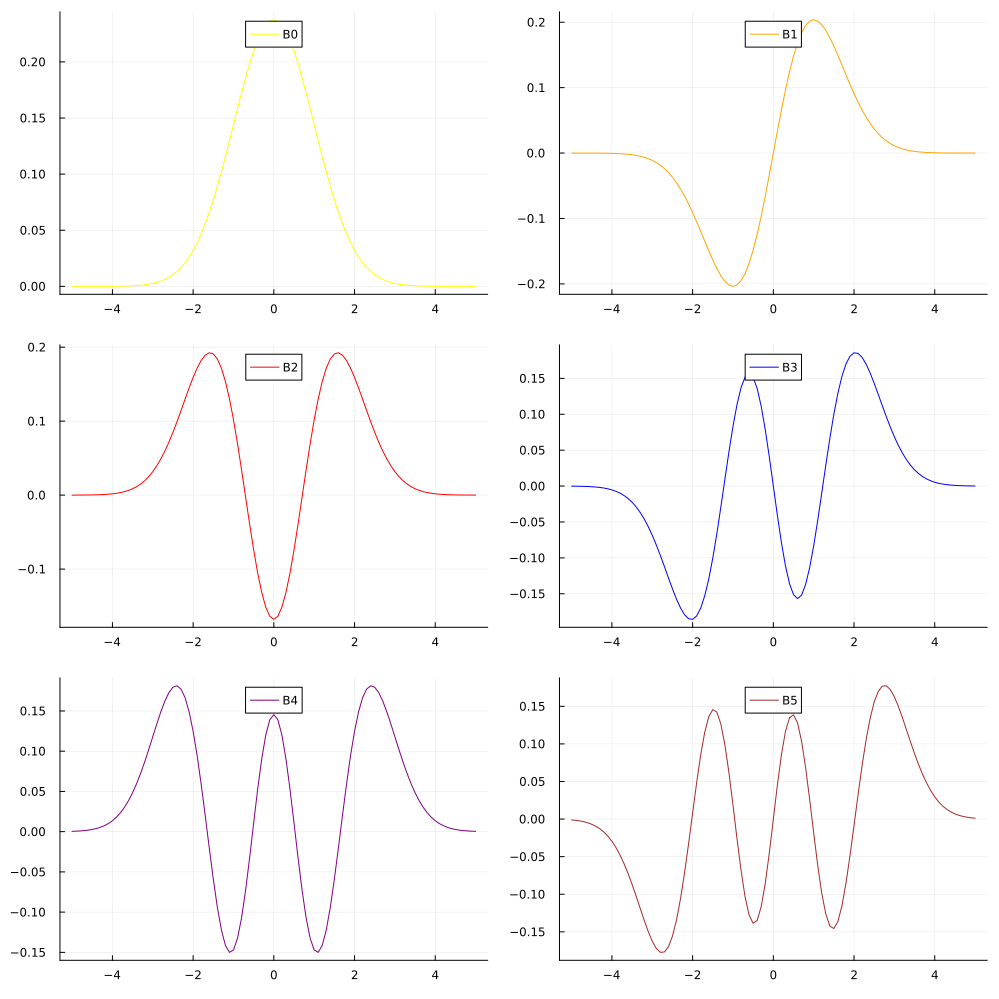

In [11]:
plot(
    size = (1000,1000),
    xs,
    [ys0,ys1,ys2,ys3,ys4,ys5],
    layout=grid(3,2),
    color = [:yellow :orange :red :blue :purple :brown],
    label = ["B0" "B1" "B2" "B3" "B4" "B5"],
    legend_position = :top
)

### Task 3 - Orthogonal polynomials

To show that polynomials themselves are not orthogonal, but with the weight function $exp(-x^2)$ they are, we can use the method of value vectors, assuming a certain interval. (1 point)

#### Hermit's Polynomials without weight function

In [24]:
ys0 = normalize([h0(x) for x in xs])
ys1 = normalize([h1(x) for x in xs])
ys2 = normalize([h2(x) for x in xs])
ys3 = normalize([h3(x) for x in xs])
ys4 = normalize([h4(x) for x in xs]);
ys5 = normalize([h4(x) for x in xs]);

In [25]:
dot_h = Array{Float64, 2}(undef, 6, 6); 

for (i, f_i) in enumerate([ys0, ys1, ys2, ys3, ys4, ys5]) 
    for (j, f_j) in enumerate([ys0, ys1, ys2, ys3, ys4, ys5])
        dot_h[i,j] = dot(f_i, f_j)
    end
end

dot_h

6×6 Matrix{Float64}:
 1.0           0.0           0.724931     …   0.570438      0.570438
 0.0           1.0          -6.93889e-18     -2.77556e-17  -2.77556e-17
 0.724931     -6.93889e-18   1.0              0.948299      0.948299
 6.93889e-18   0.900225     -3.46945e-17      5.55112e-17   5.55112e-17
 0.570438     -2.77556e-17   0.948299         1.0           1.0
 0.570438     -2.77556e-17   0.948299     …   1.0           1.0

Polynomials are not orthogonal, because their scalar products are usually different than 0 and far away from it.

#### Hermit's Polynomials with weight function

In [26]:
ys0 = base_fun(0,xs);
ys1 = base_fun(1,xs);
ys2 = base_fun(2,xs);
ys3 = base_fun(3,xs);
ys4 = base_fun(4,xs);
ys5 = base_fun(5,xs);

In [27]:
dot_base = Array{Float64, 2}(undef, 6, 6); 

for (i, f_i) in enumerate([ys0, ys1, ys2, ys3, ys4, ys5]) 
    for (j, f_j) in enumerate([ys0, ys1, ys2, ys3, ys4, ys5])
        dot_base[i,j] = dot(f_i, f_j)
    end
end

dot_base

6×6 Matrix{Float64}:
  1.0           1.17804e-17  -3.25356e-11  …  -4.52405e-10   2.83568e-17
  1.17804e-17   1.0           8.46587e-18     -1.2455e-19   -9.92118e-9
 -3.25356e-11   8.46587e-18   1.0             -1.67261e-8   -1.7485e-18
  1.85612e-18  -9.61163e-10  -7.22228e-18     -2.57256e-18  -2.04018e-7
 -4.52405e-10  -1.2455e-19   -1.67261e-8       1.0           2.68944e-17
  2.83568e-17  -9.92118e-9   -1.7485e-18   …   2.68944e-17   1.0

Polynomials are orthogonal, because their scalar products are always equal 0 or very close to it. 
In addition we can draw a conclusion that polynomial with the same degree are not orthogonal.

### Task 4 - QRS approximation

Perform an approximation of the QRS complex for both N and V types using several consecutive degrees. Present separate plots for N and V. (1 pkt)

In [30]:
ekg_data = CSV.read("ecg_data.csv", DataFrame);
first(ekg_data, 5)

Row,time,signalN,signalV
,Float64,Float64,Float64
1,-0.1,0.0183886,-0.0990972
2,-0.0972222,0.0145191,-0.0920442
3,-0.0944444,0.012849,-0.0831644
4,-0.0916667,0.0124946,-0.0722728
5,-0.0888889,0.0124117,-0.0593656


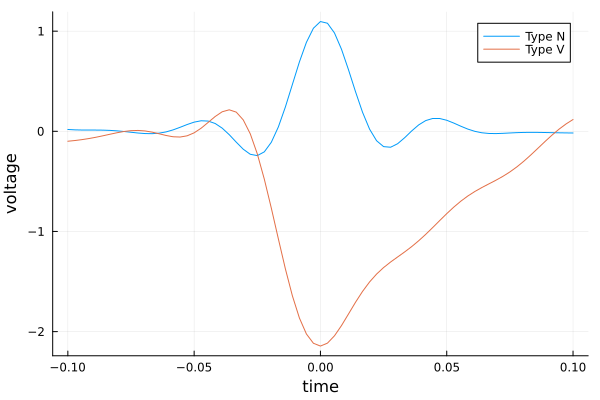

In [31]:
plot(ekg_data.time, ekg_data.signalN, label="Type N", xlabel = "time", ylabel="voltage")
plot!(ekg_data.time, ekg_data.signalV, label="Type V")

In [32]:
xx_ekg = ekg_data.time*40
yy_ekgV = ekg_data.signalV
yy_ekgN = ekg_data.signalN;

In [44]:
function get_approx_till_degree(xx, yy, max_degree)
    n = length(xx)
    polynomial_approximations = Array{Float64}(undef, n, max_degree + 1)
    ys = base_fun(0, xx)
    c = dot(yy, ys)
    approx = ys * c
    polynomial_approximations[:, 1] = approx
    
    for deg in 1:max_degree
        ys = base_fun(deg, xx)
        c = dot(yy, ys)
        approx = ys * c
        polynomial_approximations[:, deg + 1] = approx + polynomial_approximations[:,deg]
    end
    
    return polynomial_approximations
end

get_approx_till_degree (generic function with 1 method)

#### Approximation of QRS type N by Hermit's polynomials

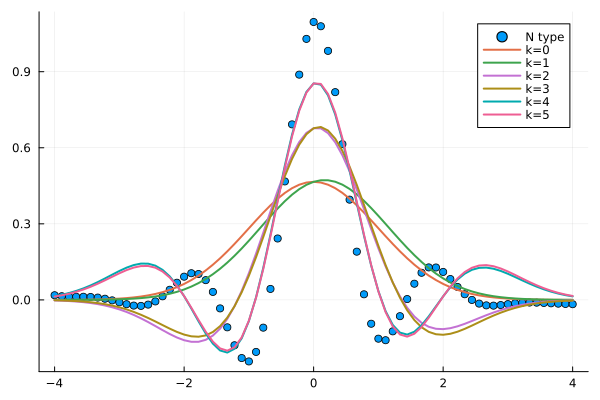

In [63]:
polynomial_approx_N = get_approx_till_degree(xx_ekg,yy_ekgN,5);
scatter(
    xx_ekg, 
    yy_ekgN, 
    markershape=:circle, 
    label="N type"
)
plot!(
    xx_ekg, 
    polynomial_approx_N,
    label=["k=0" "k=1" "k=2" "k=3" "k=4" "k=5"],
    linewidth=2
)   

#### Approximation of QRS type V by Hermit's polynomials

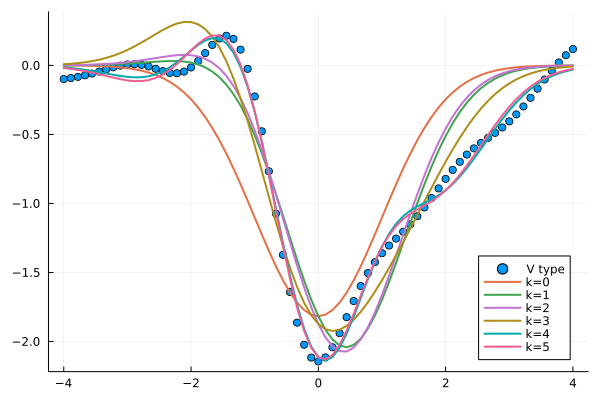

In [64]:
polynomial_approx_V = get_approx_till_degree(xx_ekg,yy_ekgV,5);
scatter(
    xx_ekg, 
    yy_ekgV, 
    markershape=:circle, 
    label="V type"
)
plot!(
    xx_ekg, 
    polynomial_approx_V,
    label=["k=0" "k=1" "k=2" "k=3" "k=4" "k=5"],
    linewidth=2
)   

### Task 5 - Approximation error

In [56]:
using Statistics
mse(y1, y2) = mean((y1-y2).^2)

mse (generic function with 1 method)

In [84]:
N_mse = Array{Float64, 2}(undef, 11, 2)
V_mse = Array{Float64, 2}(undef, 11, 2)
approx_N = get_approx_till_degree(xx_ekg,yy_ekgN,10)
approx_V = get_approx_till_degree(xx_ekg,yy_ekgV,10)
for i in 0:10
    N_mse[i+1, 1] = i
    N_mse[i+1, 2] = mse(approx_N[:,i+1], yy_ekgN)
    V_mse[i+1, 1] = i
    V_mse[i+1, 2] = mse(approx_V[:,i+1], yy_ekgV)
end

#### Approximation error in N type

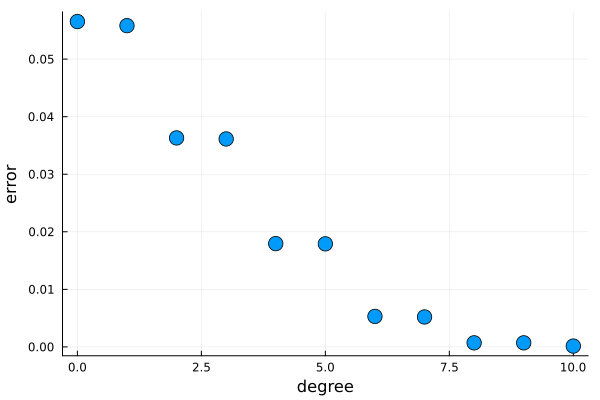

In [85]:
scatter(
    N_mse[:,1], 
    N_mse[:,2],
    label = "",
    markersize = 8,
    xlabel = "degree",
    ylabel = "error"

)

#### Approximation error in V type

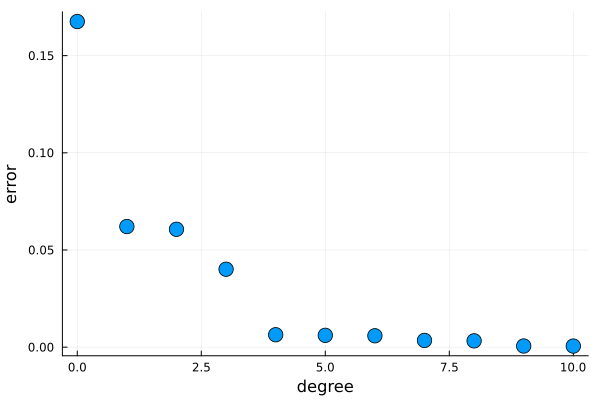

In [86]:
scatter(
    V_mse[:,1], 
    V_mse[:,2],
    label = "",
    markersize = 8,
    xlabel = "degree",
    ylabel = "error"

)

#### Conclusions

It's best to use at least 8 degree.